In [53]:
# %conda install -c conda-forge scikit-fuzzy

In [54]:
# %pip install scikit-fuzzy

In [55]:
import numpy as np
from skfuzzy import control as ctrl
from skfuzzy import membership as mf

### Define input and output variables
| Variable  | Range       |
|-----------|------------|
| Sea Water Temperature     | 280 - 310 K |
| Turbidity     | 0 - 3 /m    |
| Windspeed  | 0 - 25 km/h    |
| Bleaching Risk Level  | 0 - 100%    |


In [56]:
# Antecedent -> input variable
swt = ctrl.Antecedent(np.arange(280, 310, 0.1), 'swt')
turbidity = ctrl.Antecedent(np.arange(0, 3, 0.01), 'turbidity')
windspeed = ctrl.Antecedent(np.arange(0, 25, 0.1), 'windspeed')

# Consequent -> output variable
bleaching_risk = ctrl.Consequent(np.arange(0, 100, 0.1), 'bleaching_risk')

### Define Membership Function

Sea Water Temperature

| Linguistic Value | Fit Vector               |
| ---------------- | ------------------------ |
| Low              | (1/280, 1/290, 0/296) |
| Moderate         | (0/294, 1/298, 0/301)    |
| High             | (0/299, 1/301.5, 0/303)  |
| Extreme          | (0/302, 1/303.2, 1/310)  |


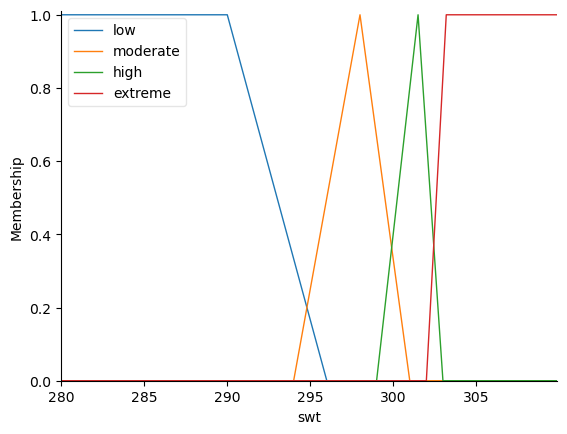

In [57]:
swt['low'] = mf.trapmf(swt.universe, [280, 280, 290, 296])
swt['moderate'] = mf.trimf(swt.universe, [294, 298, 301])
swt['high'] = mf.trimf(swt.universe, [299, 301.5, 303])
swt['extreme'] = mf.trapmf(swt.universe, [302, 303.2, 310, 310])

swt.view()

Turbidity
| Linguistic Value | Fit Vector            |
| ---------------- | --------------------- |
| Low              | (1/0, 1/0.1, 0/0.5)   |
| Moderate         | (0/0.3, 1/0.6, 0/0.9) |
| High             | (0/0.7, 1/1.0, 1/3)   |


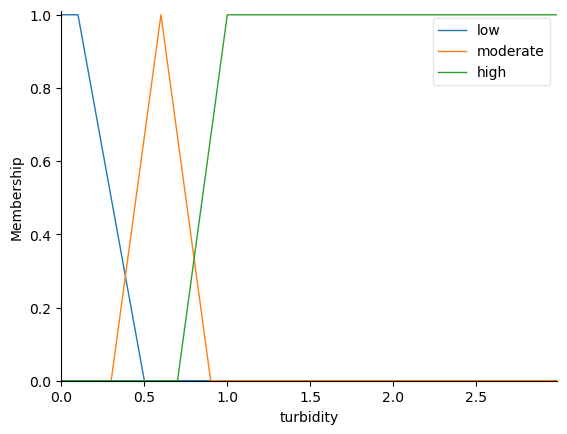

In [58]:
turbidity['low'] = mf.trapmf(turbidity.universe, [0, 0, 0.1, 0.5])
turbidity['moderate'] = mf.trimf(turbidity.universe, [0.3, 0.6, 0.9])
turbidity['high'] = mf.trapmf(turbidity.universe, [0.7, 1.0, 3, 3])

turbidity.view()

Windspeed
| Linguistic Value | Fit Vector        |
| ---------------- | ----------------- |
| Calm             | (1/0, 1/0, 0/5)   |
| Moderate         | (0/3, 1/7, 0/10)  |
| Strong           | (0/8, 1/12, 1/25) |


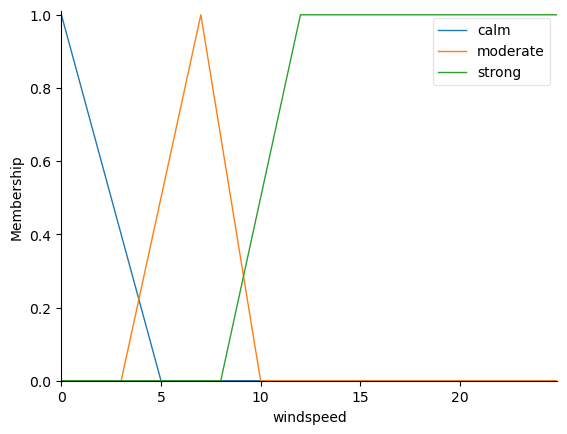

In [59]:
windspeed['calm'] = mf.trapmf(windspeed.universe, [0, 0, 0, 5])
windspeed['moderate'] = mf.trimf(windspeed.universe, [3, 7, 10])
windspeed['strong'] = mf.trapmf(windspeed.universe, [8, 12, 25, 25])

windspeed.view()

Bleaching Risk Level
| Linguistic Value | Fit Vector          |
| ---------------- | ------------------- |
| Low              | (1/0, 1/15, 0/25)   |
| Moderate         | (0/20, 1/40, 0/60)  |
| High             | (0/50, 1/70, 0/85)  |
| Severe           | (0/80, 1/90, 1/100) |


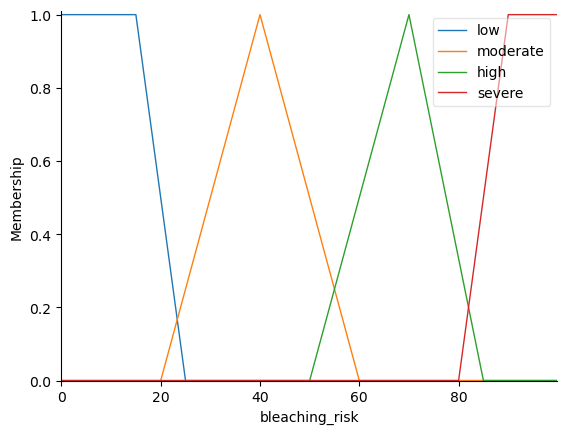

In [60]:
bleaching_risk['low'] = mf.trapmf(bleaching_risk.universe, [0, 0, 15, 25])
bleaching_risk['moderate'] = mf.trimf(bleaching_risk.universe, [20, 40, 60])
bleaching_risk['high'] = mf.trimf(bleaching_risk.universe, [50, 70, 85])
bleaching_risk['severe'] = mf.trapmf(bleaching_risk.universe, [80, 90, 100, 100])

bleaching_risk.view()

### Define Rules

In [ ]:
# --- SWT = Low

# ------ Turbidity = Low
rule1 = ctrl.Rule(swt['low'] & turbidity['low'] & windspeed['calm'], bleaching_risk['low'])
rule2 = ctrl.Rule(swt['low'] & turbidity['low'] & windspeed['moderate'], bleaching_risk['low'])
rule3 = ctrl.Rule(swt['low'] & turbidity['low'] & windspeed['strong'], bleaching_risk['low'])

# ------ Turbidity = Moderate
rule4 = ctrl.Rule(swt['low'] & turbidity['moderate'] & windspeed['calm'], bleaching_risk['low'])
rule5 = ctrl.Rule(swt['low'] & turbidity['moderate'] & windspeed['moderate'], bleaching_risk['low'])
rule6 = ctrl.Rule(swt['low'] & turbidity['moderate'] & windspeed['strong'], bleaching_risk['low'])

# ------ Turbidity = High
rule7 = ctrl.Rule(swt['low'] & turbidity['high'] & windspeed['calm'], bleaching_risk['low'])
rule8 = ctrl.Rule(swt['low'] & turbidity['high'] & windspeed['moderate'], bleaching_risk['low'])
rule9 = ctrl.Rule(swt['low'] & turbidity['high'] & windspeed['strong'], bleaching_risk['low'])

# --- SWT = Moderate

# ------ Turbidity = Low
rule10 = ctrl.Rule(swt['moderate'] & turbidity['low'] & windspeed['calm'], bleaching_risk['moderate'])
rule11 = ctrl.Rule(swt['moderate'] & turbidity['low'] & windspeed['moderate'], bleaching_risk['low'])
rule12 = ctrl.Rule(swt['moderate'] & turbidity['low'] & windspeed['strong'], bleaching_risk['low'])

# ------ Turbidity = Moderate
rule13 = ctrl.Rule(swt['moderate'] & turbidity['moderate'] & windspeed['calm'], bleaching_risk['moderate'])
rule14 = ctrl.Rule(swt['moderate'] & turbidity['moderate'] & windspeed['moderate'], bleaching_risk['moderate'])
rule15 = ctrl.Rule(swt['moderate'] & turbidity['moderate'] & windspeed['strong'], bleaching_risk['low'])

# ------ Turbidity = High
rule16 = ctrl.Rule(swt['moderate'] & turbidity['high'] & windspeed['calm'], bleaching_risk['moderate'])
rule17 = ctrl.Rule(swt['moderate'] & turbidity['high'] & windspeed['moderate'], bleaching_risk['moderate'])
rule18 = ctrl.Rule(swt['moderate'] & turbidity['high'] & windspeed['strong'], bleaching_risk['moderate'])

# --- SWT = High

# ------ Turbidity = Low
rule19 = ctrl.Rule(swt['high'] & turbidity['low'] & windspeed['calm'], bleaching_risk['high'])
rule20 = ctrl.Rule(swt['high'] & turbidity['low'] & windspeed['moderate'], bleaching_risk['moderate'])
rule21 = ctrl.Rule(swt['high'] & turbidity['low'] & windspeed['strong'], bleaching_risk['moderate'])

# ------ Turbidity = Moderate
rule22 = ctrl.Rule(swt['high'] & turbidity['moderate'] & windspeed['calm'], bleaching_risk['high'])
rule23 = ctrl.Rule(swt['high'] & turbidity['moderate'] & windspeed['moderate'], bleaching_risk['high'])
rule24 = ctrl.Rule(swt['high'] & turbidity['moderate'] & windspeed['strong'], bleaching_risk['moderate'])

# ------ Turbidity = High
rule25 = ctrl.Rule(swt['high'] & turbidity['high'] & windspeed['calm'], bleaching_risk['severe'])
rule26 = ctrl.Rule(swt['high'] & turbidity['high'] & windspeed['moderate'], bleaching_risk['high'])     
rule27 = ctrl.Rule(swt['high'] & turbidity['high'] & windspeed['strong'], bleaching_risk['moderate'])

# --- SWT = Extreme

# ------ Turbidity = Low
rule28 = ctrl.Rule(swt['extreme'] & turbidity['low'] & windspeed['calm'], bleaching_risk['severe'])
rule29 = ctrl.Rule(swt['extreme'] & turbidity['low'] & windspeed['moderate'], bleaching_risk['high'])
rule30 = ctrl.Rule(swt['extreme'] & turbidity['low'] & windspeed['strong'], bleaching_risk['high'])

# ------ Turbidity = Moderate
rule31 = ctrl.Rule(swt['extreme'] & turbidity['moderate'] & windspeed['calm'], bleaching_risk['severe'])
rule32 = ctrl.Rule(swt['extreme'] & turbidity['moderate'] & windspeed['moderate'], bleaching_risk['severe'])
rule33 = ctrl.Rule(swt['extreme'] & turbidity['moderate'] & windspeed['strong'], bleaching_risk['high'])

# ------ Turbidity = High
rule34 = ctrl.Rule(swt['extreme'] & turbidity['high'] & windspeed['calm'], bleaching_risk['severe'])
rule35 = ctrl.Rule(swt['extreme'] & turbidity['high'] & windspeed['moderate'], bleaching_risk['severe'])     
rule36 = ctrl.Rule(swt['extreme'] & turbidity['high'] & windspeed['strong'], bleaching_risk['severe'])

rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, rule36]


### Construct the fuzzy control system

In [62]:
train_ctrl = ctrl.ControlSystem(rules = rules)
train = ctrl.ControlSystemSimulation(control_system = train_ctrl)

In [63]:
# define the values for the inputs
train.input['swt'] = 301.82
train.input['turbidity'] = 0.0854
train.input['windspeed'] = 1

# compute the outputs
train.compute()

# print the output values
print(train.output)

# to extract one of the outputs
print(train.output['bleaching_risk'])

{'bleaching_risk': 68.27081807081795}
68.27081807081795


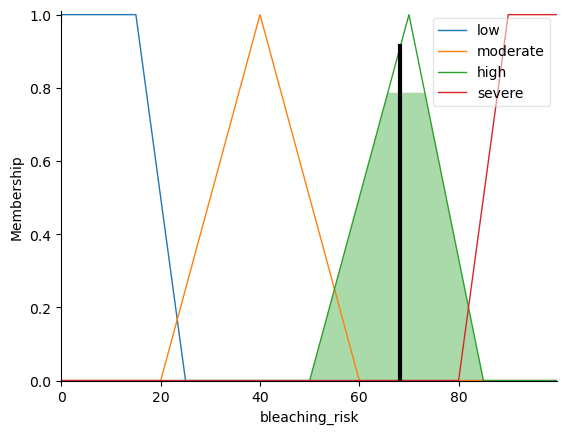

In [64]:
bleaching_risk.view(sim=train)
